In [ ]:
!pip install basemap
!pip install pyvista pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/all_month.csv")
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
data

time   latitude   longitude  depth   mag magType  \
0     2023-02-06T09:24:52.450Z  33.527000 -116.779167  11.64  0.94      ml   
1     2023-02-06T09:04:16.590Z  19.193001 -155.392838  32.18  2.77      md   
2     2023-02-06T08:58:45.507Z  61.110200 -151.162700  53.90  2.00      ml   
3     2023-02-06T08:52:37.335Z  37.449000   37.233400  10.00  4.80      mb   
4     2023-02-06T08:51:11.930Z  38.842667 -122.829666   2.48  0.66      md   
...                        ...        ...         ...    ...   ...     ...   
9394  2023-01-07T09:56:14.929Z  61.695000 -146.491500  36.60  1.10      ml   
9395  2023-01-07T09:52:03.738Z  62.316500 -151.554000  90.60  1.20      ml   
9396  2023-01-07T09:50:20.885Z  69.150700 -144.563700  15.70  1.60      ml   
9397  2023-01-07T09:42:17.484Z  67.472500 -166.586100  19.50  1.80      ml   
9398  2023-01-07T09:39:24.184Z  54.704000 -159.740300  24.10  1.90      ml   

       nst    gap      dmin   rms  ...                   updated  \
0      9.0  240.0  0.051860  0.11  ...  2023-02-06T09:28:26.675Z   
1     33.0  180.0  0.277000  0.12  ...  2023-02-06T09:07:27.210Z   
2     58.0   61.0  0.012950  0.75  ...  2023-02-06T09:01:03.183Z   
3     11.0  115.0  0.014050  0.78  ...  2023-02-06T09:31:48.040Z   
4      9.0   62.0  0.006894  0.03  ...  2023-02-06T09:15:15.395Z   
...    ...    ...       ...   ...  ...                       ...   
9394   NaN    NaN       NaN  0.41  ...  2023-01-25T02:21:24.901Z   
9395   NaN    NaN       NaN  0.38  ...  2023-01-25T02:21:24.696Z   
9396   NaN    NaN       NaN  0.23  ...  2023-01-26T00:27:22.082Z   
9397   NaN    NaN       NaN  0.31  ...  2023-01-26T00:27:21.910Z   
9398   NaN    NaN       NaN  0.40  ...  2023-01-25T02:21:34.368Z   

                               place        type horizontalError depthError  \
0               10km WSW of Anza, CA  earthquake            2.43      1.970   
1           9 km E of Pāhala, Hawaii  earthquake            0.62      0.780   
2         4 km NNW of Tyonek, Alaska  earthquake            7.54      1.000   
3        7 km SW of Pazarcık, Turkey  earthquake            0.33      1.884   
4               10km WNW of Cobb, CA  earthquake            0.44      0.990   
...                              ...         ...             ...        ...   
9394   36 km SSE of Nelchina, Alaska  earthquake             NaN      0.600   
9395   37 km NNW of Skwentna, Alaska  earthquake             NaN      0.500   
9396  115 km SSW of Kaktovik, Alaska  earthquake             NaN      2.200   
9397   91 km WSW of Kivalina, Alaska  earthquake             NaN      1.300   
9398  85 km SE of Sand Point, Alaska  earthquake             NaN      0.300   

      magError  magNst     status  locationSource magSource  
0        0.331    11.0  automatic              ci        ci  
1        2.770     4.0  automatic              hv        hv  
2        0.072    60.0  automatic              ak        ak  
3        0.240    12.0   reviewed              us        us  
4        0.230    10.0  automatic              nc        nc  
...        ...     ...        ...             ...       ...  
9394       NaN     NaN   reviewed              ak        ak  
9395       NaN     NaN   reviewed              ak        ak  
9396       NaN     NaN   reviewed              ak        ak  
9397       NaN     NaN   reviewed              ak        ak  
9398       NaN     NaN   reviewed              ak        ak  

[9399 rows x 22 columns]

In [ ]:
wave = "/content/IU.ANTO.00.BHZ.2023.037.01.17.40.000-2023.037.01.47.40.000.wav"

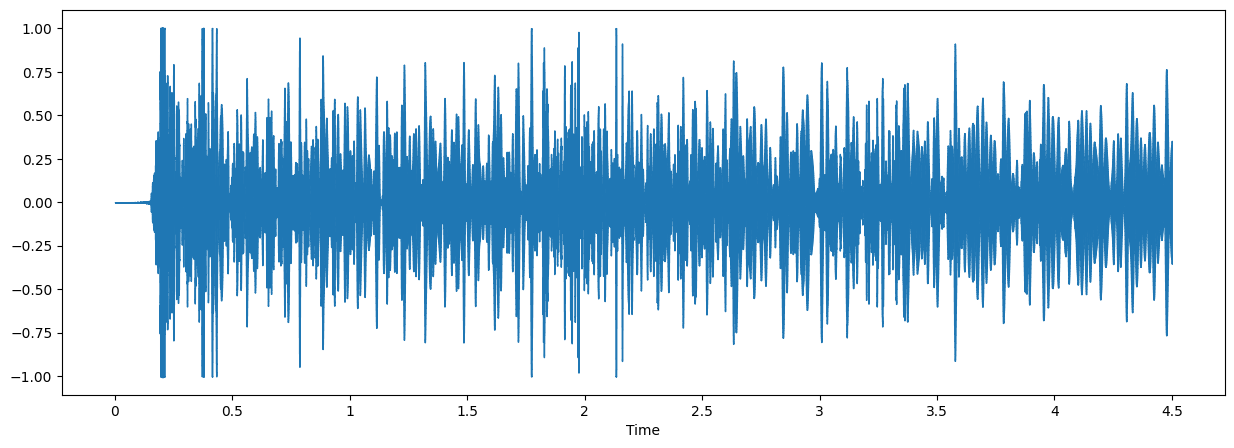

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import librosa, librosa.display

data, sampling_rate = librosa.load(wave)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Paly it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

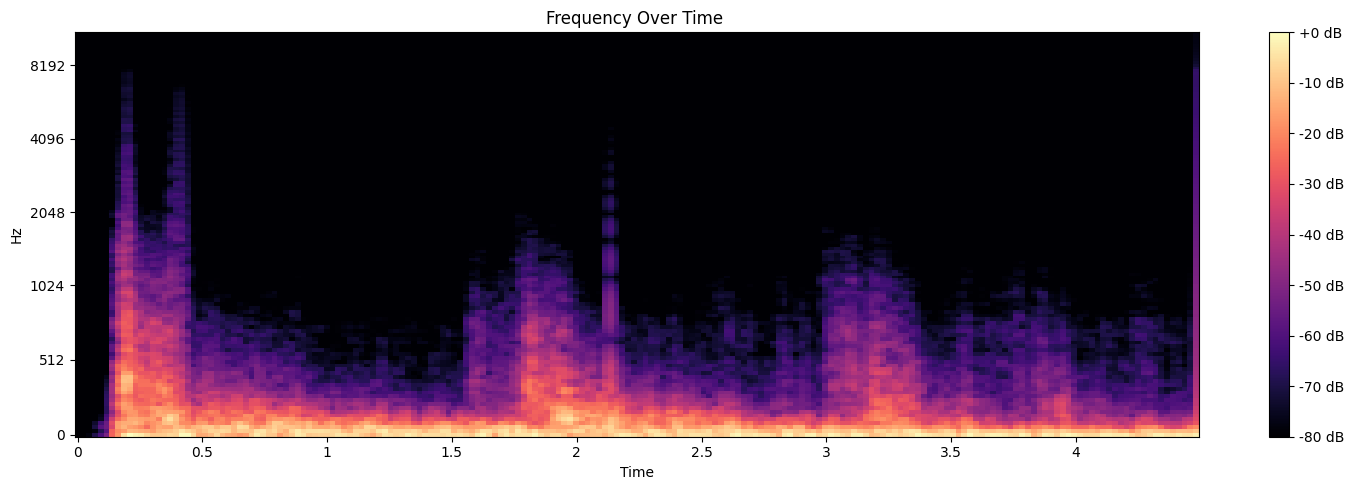

In [ ]:
import librosa
import librosa.display

data, sampling_rate = librosa.load(wave)

# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=data, sr=sampling_rate)

# Convert to decibels
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_spec_db, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Frequency Over Time ')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import datetime
import time

# Assuming that 'data' is a pandas dataframe with columns 'time' and 'time'

timestamp = []
for d, t in zip(data['time'], data['time']):
    if d is None or t is None:
        timestamp.append(None)
    else:
        try:
            ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
            timestamp.append(time.mktime(ts.timetuple()))
        except ValueError:
            timestamp.append(None)

data['timestamp'] = timestamp
final_data = data.drop(['time', 'time'], axis=1)
final_data = final_data.dropna(subset=['timestamp'])  # drop rows with missing timestamp values
final_data = final_data.reset_index(drop=True)  # reset the row index
final_data.head()


Empty DataFrame
Columns: [latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource, timestamp]
Index: []

[0 rows x 22 columns]

# Visualization 1


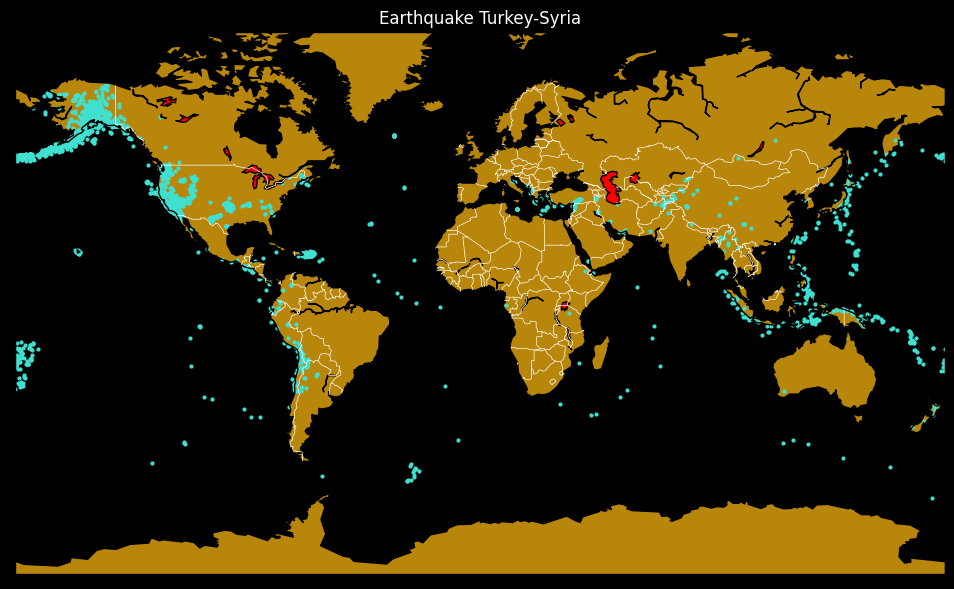

In [ ]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/all_month.csv')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
fig.patch.set_facecolor('black')  # set background color to black
plt.title("Earthquake Turkey-Syria", color='white')
m.plot(x, y, "o", markersize = 2, color = 'turquoise')
m.drawcoastlines()
m.fillcontinents(color='darkgoldenrod',lake_color='red')
m.drawmapboundary(fill_color='black')  # fill the map boundary with black color
m.drawcountries(color='white')

# Add labels for parallels and meridians
plt.show()


# Visualization 2

In [ ]:
import requests
import pandas as pd
import folium
from folium.plugins import HeatMap


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 500)


start_time = 'now-180days'
min_magnitude = 3
latitude = 39.1458
longitude = 34.1614
max_radius_km = 1500

data = pd.read_csv('/content/all_month.csv')
mags = []
times = []
lats = []
lons = []
weights = []

In [ ]:
turkey_coord = [39, 35]
turkey_map_normal = folium.Map(location=turkey_coord, zoom_start=5.5)
HeatMap(data=data[['latitude', 'longitude', 'depth']], radius=15).add_to(turkey_map_normal)

for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag']/2,
        color='red',
        fill_color='red').add_to(turkey_map_normal)

turkey_map_normal

# Visualization 3

In [ ]:
import pandas as pd

data = pd.read_csv("/content/all_month.csv")

print(data.head())

                       time  latitude  longitude  depth   mag magType    nst     gap  dmin   rms net            id                   updated                        place        type  horizontalError  depthError  magError  magNst     status locationSource magSource
0  2023-02-06T09:24:52.450Z    33.527   -116.779 11.640 0.940      ml  9.000 240.000 0.052 0.110  ci    ci40411544  2023-02-06T09:28:26.675Z         10km WSW of Anza, CA  earthquake            2.430       1.970     0.331  11.000  automatic             ci        ci
1  2023-02-06T09:04:16.590Z    19.193   -155.393 32.180 2.770      md 33.000 180.000 0.277 0.120  hv    hv73320217  2023-02-06T09:07:27.210Z     9 km E of Pāhala, Hawaii  earthquake            0.620       0.780     2.770   4.000  automatic             hv        hv
2  2023-02-06T08:58:45.507Z    61.110   -151.163 53.900 2.000      ml 58.000  61.000 0.013 0.750  ak  ak0231pbzu3m  2023-02-06T09:01:03.183Z   4 km NNW of Tyonek, Alaska  earthquake            7.540       

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['mag'].max()

# Create a lollipop chart to highlight the maximum magnitudes
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_magnitude.index, y=max_magnitude.values,
                    mode='markers', marker=dict(color='Brown', size=10)))

fig.add_trace(go.Scatter(x=max_magnitude.index, y=max_magnitude.values,
                    mode='lines', line=dict(color='gray', width=2)))

# Add labels and title
fig.update_layout(title='Maximum Magnitude of Earthquakes over Time',
                  xaxis_title='Date', yaxis_title='Magnitude')

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Group the data by date and calculate the maximum magnitude for each date
max_depth = data.groupby(data['time'].dt.date)['depth'].max()

# Create a trace for the maximum depths
trace1 = go.Scatter(x=max_depth.index, y=max_depth.values, mode='lines', line=dict(color='gray', width=2))

# Create a trace for the lollipop markers
trace2 = go.Scatter(x=max_depth.index, y=max_depth.values, mode='markers', marker=dict(color='brown', size=12))

# Create the layout for the plot
layout = go.Layout(title='Maximum Depth of Earthquakes over Time', xaxis=dict(title='Date'), yaxis=dict(title='Depth'))

# Combine the traces and layout into a figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['depth'].max().reset_index()

# Create a lollipop plot to highlight the maximum magnitudes
fig = px.scatter(max_magnitude, x='time', y='depth', color='depth', size='depth', 
                 hover_data={'depth': ':.2f'})
fig.update_traces(mode='markers+text', textposition='top center', textfont_size=12)

# Set axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Depth', 
                  title='Maximum Depth of Earthquakes over Time')

# Remove the top and right spines of the plot
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

# Show the plot
fig.show()
# Export the plot as an HTML file
fig.write_html('earthquake_depth.html')

In [ ]:
import plotly.express as px

# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['mag'].max().reset_index()

# Create a lollipop plot to highlight the maximum magnitudes
fig = px.scatter(max_magnitude, x='time', y='mag', color='mag', size='mag', 
                 hover_data={'mag': ':.2f'})
fig.update_traces(mode='markers+text', textposition='top center', textfont_size=12)

# Set axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Magnitude', 
                  title='Maximum Magnitude of Earthquakes over Time')

# Remove the top and right spines of the plot
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

# Show the plot
fig.show()

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['depth'].max().reset_index()

# Create a lollipop plot to highlight the maximum magnitudes
fig = px.scatter(max_magnitude, x='time', y='depth', color='depth', size='depth', 
                 hover_data={'depth': ':.2f'})
fig.update_traces(mode='markers+text', textposition='top center', textfont_size=12)

# Set axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Depth', 
                  title='Maximum Depth of Earthquakes over Time')

# Remove the top and right spines of the plot
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objs as go

# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['depth'].max().reset_index()

# Create a lollipop plot to highlight the maximum magnitudes
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_magnitude['time'], y=max_magnitude['depth'], mode='lines', 
                         line=dict(color='gray', width=2)))
fig.add_trace(go.Scatter(x=max_magnitude['time'], y=max_magnitude['depth'], mode='markers', 
                         marker=dict(color='Brown', size=10), name='Maximum Depth'))

# Set axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Depth', 
                  title='Maximum Depth of Earthquakes over Time')
fig.show()

# Remove the top and right spines of the plot
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['mag'].max().reset_index()

# Create a lollipop plot to highlight the maximum magnitudes
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_magnitude['time'], y=max_magnitude['mag'], mode='lines', 
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=max_magnitude['time'], y=max_magnitude['mag'], mode='markers', 
                         marker=dict(color='tan', size=10), name='Maximum Magnitude'))

# Set axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Magnitude', 
                  title='Maximum Magnitude of Earthquakes over Time')

# Remove the top and right spines of the plot
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)


# Show the plot
fig.show()
# Export the plot as an HTML file
fig.write_html('earthquake_depth.html')
fig.write_html('earthquake_magnitude.html')

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio


# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Group the data by date and calculate the maximum magnitude for each date
max_magnitude = data.groupby(data['time'].dt.date)['depth'].max().reset_index()

# Create a lollipop plot to highlight the maximum magnitudes
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_magnitude['time'], y=max_magnitude['depth'], mode='lines', 
                         line=dict(color='gray', width=2)))
fig.add_trace(go.Scatter(x=max_magnitude['time'], y=max_magnitude['depth'], mode='markers', 
                         marker=dict(color='Brown', size=10), name='Maximum Depth'))

# Set axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Depth', 
                  title='Maximum Depth of Earthquakes over Time')
fig.show()

# Save the plot as an HTML file
pio.write_html(fig, file='max_depth_plot.html', auto_open=True)